In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '../Dataset/dailyActivity_merged.csv'
data = pd.read_csv(file_path)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [6]:
data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [8]:
data.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [11]:
correlations = data.corr(numeric_only=True)['Calories'].sort_values(ascending=False)
print("\nCorrelations with Calories:\n", correlations)


Correlations with Calories:
 Calories                    1.000000
TrackerDistance             0.645313
TotalDistance               0.644962
VeryActiveMinutes           0.615838
TotalSteps                  0.591568
VeryActiveDistance          0.491959
LightActiveDistance         0.466917
Id                          0.396671
FairlyActiveMinutes         0.297623
LightlyActiveMinutes        0.286718
ModeratelyActiveDistance    0.216790
LoggedActivitiesDistance    0.207595
SedentaryActiveDistance     0.043652
SedentaryMinutes           -0.106973
Name: Calories, dtype: float64


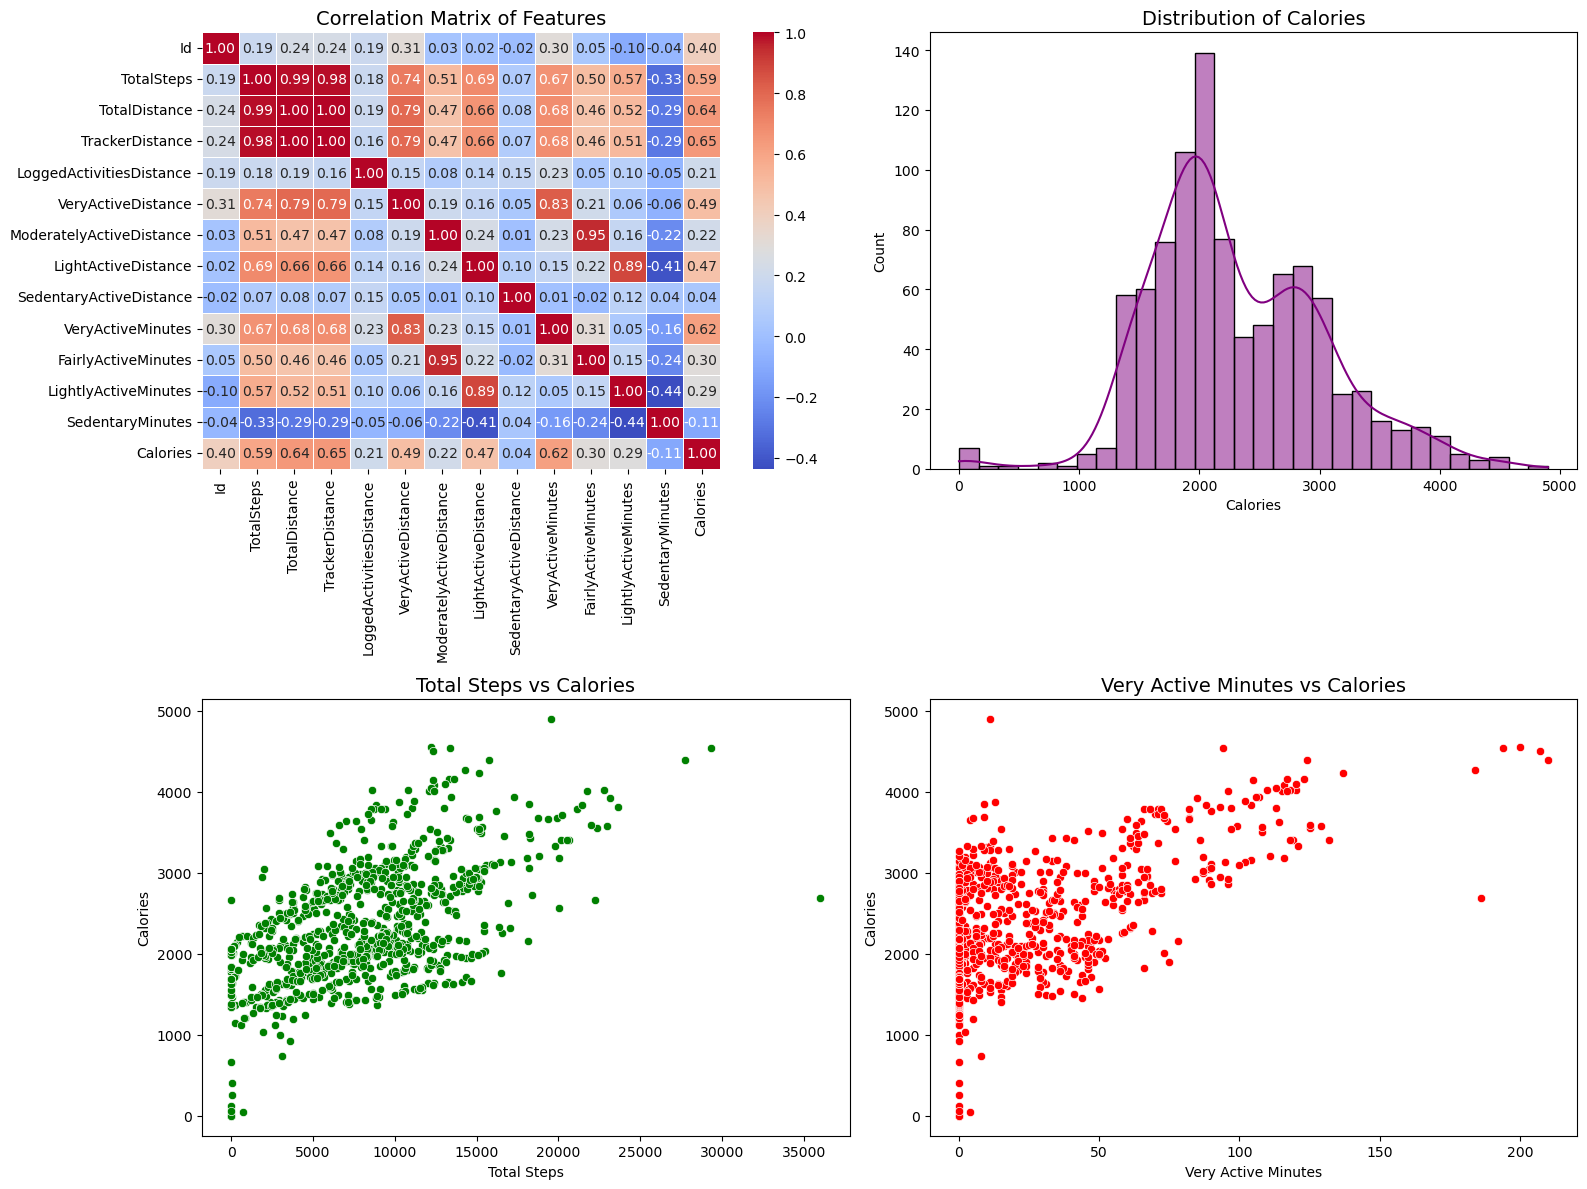

In [12]:
plt.figure(figsize=(16, 12))

# Plot 1: Correlation heatmap (numeric columns only)
plt.subplot(2, 2, 1)
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features', fontsize=14)

# Plot 2: Distribution of Calories
plt.subplot(2, 2, 2)
sns.histplot(data['Calories'], kde=True, bins=30, color='purple')
plt.title('Distribution of Calories', fontsize=14)
plt.xlabel('Calories')

# Plot 3: Scatter plot of Total Steps vs Calories
plt.subplot(2, 2, 3)
sns.scatterplot(x=data['TotalSteps'], y=data['Calories'], color='green')
plt.title('Total Steps vs Calories', fontsize=14)
plt.xlabel('Total Steps')
plt.ylabel('Calories')

# Plot 4: Very Active Minutes vs Calories
plt.subplot(2, 2, 4)
sns.scatterplot(x=data['VeryActiveMinutes'], y=data['Calories'], color='red')
plt.title('Very Active Minutes vs Calories', fontsize=14)
plt.xlabel('Very Active Minutes')
plt.ylabel('Calories')

plt.tight_layout()
plt.show()

Untuk menjawab pertanyaan-pertanyaan tersebut secara lengkap, berikut adalah penjelasan yang dapat Anda gunakan, berdasarkan analisis yang telah dilakukan:

### 1. **Apa saja attributes dan target output dari dataset yang dipilih?**
   - **Attributes (Features)**:
     - Dataset ini terdiri dari beberapa atribut yang berhubungan dengan aktivitas fisik pengguna, seperti:
       - **Id**: Identitas pengguna.
       - **TotalSteps**: Jumlah langkah total yang diambil pengguna.
       - **TotalDistance**: Jarak total yang ditempuh (dalam kilometer).
       - **TrackerDistance**: Jarak yang dilacak oleh perangkat.
       - **LoggedActivitiesDistance**: Jarak yang tercatat dari aktivitas yang dilacak secara manual.
       - **VeryActiveDistance**: Jarak yang ditempuh selama aktivitas fisik yang sangat aktif.
       - **ModeratelyActiveDistance**: Jarak yang ditempuh selama aktivitas moderat.
       - **LightActiveDistance**: Jarak yang ditempuh selama aktivitas ringan.
       - **SedentaryActiveDistance**: Jarak yang ditempuh saat aktivitas ringan.
       - **VeryActiveMinutes**: Jumlah menit yang dihabiskan untuk aktivitas sangat aktif.
       - **FairlyActiveMinutes**: Jumlah menit yang dihabiskan untuk aktivitas cukup aktif.
       - **LightlyActiveMinutes**: Jumlah menit yang dihabiskan untuk aktivitas ringan.
       - **SedentaryMinutes**: Jumlah menit dalam kondisi duduk atau tidak bergerak.
       - **Calories**: **Target output**, yaitu jumlah kalori yang dibakar oleh pengguna.
     
     - Atribut **ActivityDate** berisi tanggal dalam format string yang dapat diabaikan dalam perhitungan numerik karena tidak relevan untuk prediksi kalori.

   - **Target Output**: 
     - **Calories**: Kolom ini berisi jumlah kalori yang dibakar oleh pengguna, yang merupakan variabel target untuk diprediksi.

### 2. **Untuk setiap feature yang disiapkan, apakah sudah dicek deskriptif statistics-nya dan distribusi serta korelasi terhadap variabel target?**
   - **Descriptive Statistics**: 
     - Sudah dilakukan, di mana statistik deskriptif seperti rata-rata, standar deviasi, nilai minimum, kuartil, dan maksimum untuk semua fitur numerik telah dihitung.
     - Contoh:
       - **TotalSteps**: Rata-rata 7637 langkah dengan maksimum 36.019 langkah.
       - **Calories**: Rata-rata kalori yang dibakar adalah 2303 kcal dengan nilai maksimum 4900 kcal.
   
   - **Distribusi**:
     - Distribusi dari **Calories** menunjukkan adanya variasi yang besar, di mana sebagian besar orang membakar kalori antara 1800 hingga 2800 kcal per hari.
   
   - **Korelasi Terhadap Variabel Target (Calories)**:
     - Korelasi sudah dicek. Beberapa fitur dengan korelasi kuat terhadap target **Calories** adalah:
       - **TrackerDistance**: Korelasi positif sebesar 0.65.
       - **TotalDistance**: Korelasi positif sebesar 0.64.
       - **VeryActiveMinutes**: Korelasi positif sebesar 0.62.
       - **TotalSteps**: Korelasi positif sebesar 0.59.
     - Korelasi negatif yang kecil ditemukan pada **SedentaryMinutes** (-0.11), menunjukkan bahwa semakin lama waktu duduk, semakin sedikit kalori yang dibakar.

### 3. **Apakah sudah menemukan beberapa insight menarik dari dataset tersebut, termasuk visualisasi yang mendukung serta kaitan dari problem utama yang ingin diselesaikan?**
   Beberapa insight menarik yang sudah ditemukan dari EDA (Exploratory Data Analysis) adalah:

   - **Insight 1: Jarak tempuh memiliki pengaruh signifikan terhadap kalori yang dibakar**:
     - Atribut seperti **TotalDistance** dan **TrackerDistance** menunjukkan korelasi positif yang kuat dengan **Calories**. Ini berarti semakin jauh jarak yang ditempuh pengguna, semakin banyak kalori yang dibakar. Visualisasi heatmap dan scatter plot mendukung insight ini.

   - **Insight 2: Aktivitas fisik yang sangat intensif berhubungan dengan pembakaran kalori yang lebih tinggi**:
     - Korelasi antara **VeryActiveMinutes** (menit aktivitas sangat aktif) dengan **Calories** cukup kuat (0.62). Dari scatter plot terlihat bahwa orang yang memiliki menit aktif lebih banyak, cenderung membakar kalori lebih banyak. Ini menunjukkan bahwa aktivitas intensif memiliki dampak besar pada pembakaran kalori.

   - **Insight 3: Jumlah langkah harian memengaruhi pembakaran kalori, namun tidak secara linier**:
     - Scatter plot antara **TotalSteps** dan **Calories** menunjukkan hubungan yang positif, tetapi tidak terlalu linier. Ini menunjukkan bahwa meskipun banyak langkah dapat meningkatkan kalori yang dibakar, jenis aktivitas dan intensitasnya juga memegang peran penting dalam variasi kalori yang dibakar.

Dari tiga poin di atas, dapat disimpulkan bahwa semakin tinggi tingkat aktivitas fisik dan semakin banyak langkah atau jarak yang ditempuh, semakin banyak kalori yang akan dibakar, yang berhubungan langsung dengan tujuan utama untuk **memodelkan pembakaran kalori berdasarkan aktivitas fisik pengguna**.